# Location Processing of the Suburbs

We are given some geographical information about the suburbs within the sheets. In this notebook, we set out to locate them on the map. 

## Key Geographic Information Utilized

The main Geographic Information used to locate the suburbs is the `Location` feature, which is defined as the following:

***Location**: Description of the direction and distance (as the crow flies) from Melbourne GPO to the centroid of the community. Calculations were performed using ESRI ArcGIS 10.0*

We have used the Melbourne GPO's Google Maps co-ordinates to get a rough idea as to how the communities are located. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy as gp
import geopy.distance as gd
import geopy.point as gp

# Melbourne GPO coordinates
melb_gpo = (-37.81384, 144.963028)

# Read in the data
data = pd.read_csv('combined_data.csv')

data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.490453,4.912570,3313.052180,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,8.071881,6.216803,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,10.683462,9.413847,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,3799.030890,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315


We now need to parse the `Location` entries.

In [2]:
def parse_raw_loc(x):
	temp=(x.split(' of Melbourne')[0]).split('km ')
	return (int(temp[0]),temp[1])

parse_raw_loc('28km E of Melbourne')

(28, 'E')

Define a lookup for the bearings w.r.t directions

In [3]:
# define a direction to compass bearing dictionary
direction_to_bearing = {
	'N': 0,
	'NNE': 22.5,
	'NE': 45,
	'ENE': 67.5,
	'E': 90,
	'ESE': 112.5,
	'SE': 135,
	'SSE': 157.5,
	'S': 180,
	'SSW': 202.5,
	'SW': 225,
	'WSW': 247.5,
	'W': 270,
	'WNW': 292.5,
	'NW': 315,
	'NNW': 337.5
}

In [4]:
def get_geo_coords(x):
	# get the distance and direction from the city
	dist, direction = parse_raw_loc(x)
	# get the bearing
	bearing = direction_to_bearing[direction]
	# get the city coordinates
	melbourne_coords = melb_gpo
	# get the geodesic distance
	geod = gd.geodesic(kilometers=dist)
	coords = geod.destination(melbourne_coords, bearing, dist)
	lat, lon = coords.latitude, coords.longitude
	return np.asarray([lat, lon])

get_geo_coords('28km E of Melbourne')

array([-37.81341081, 145.28101336])

In [5]:
# create a new column with the coordinates
data['geo_coords'] = data['Location'].apply(get_geo_coords)

data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_coords
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,4.912570,3313.052180,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,"[-37.77560561610016, 144.91487058127825]"
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,6.216803,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,"[-37.77931503328412, 144.858154908118]"
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,15.213189,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,"[-37.570576289335236, 144.963028]"
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,9.413847,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,"[-37.813410812880704, 145.28101336486003]"
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,12.004044,3799.030890,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,"[-37.70572403739175, 144.963028]"


We'll now plot the centroids of the suburbs on a zoomed-in map of Australia.

In [6]:
suburb_coords = data['geo_coords'].tolist()

# estimate the rectangular boundary for the plot
latitudes, longitudes = zip(*suburb_coords)
min_lat, max_lat = min(latitudes), max(latitudes)
min_lon, max_lon = min(longitudes), max(longitudes)

print('Min latitude:', min_lat)
print('Max latitude:', max_lat)
print('Min longitude:', min_lon)
print('Max longitude:', max_lon)


Min latitude: -38.42645948886427
Max latitude: -37.570576289335236
Min longitude: 144.69168019162356
Max longitude: 145.28101336486003


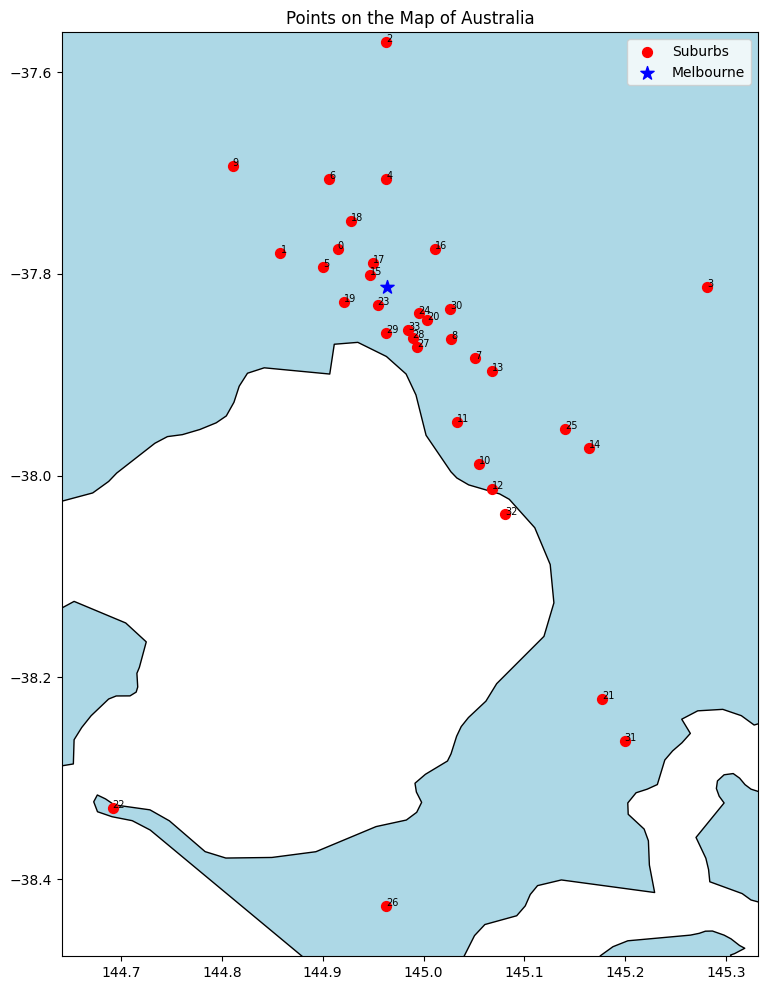

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

def suburb_plot(lat_lon_pairs, map_path="country_high_res/ne_10m_admin_0_countries.shp"):
	# Create a GeoDataFrame with the latitude and longitude pairs
	data = {'latitude': [pair[0] for pair in lat_lon_pairs],
			'longitude': [pair[1] for pair in lat_lon_pairs]}
	geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
	gdf = gpd.GeoDataFrame(data, geometry=geometry)

	# Load the world map from the downloaded shapefile
	world = gpd.read_file(map_path)

	# Filter for Australia only
	australia = world[world['NAME'] == 'Australia']

	# Plotting the map of Australia and the points
	fig, ax = plt.subplots(figsize=(12, 12))
	australia.plot(ax=ax, color='lightblue', edgecolor='black')
	gdf.plot(ax=ax, color='red', markersize=50)
	ax.set_xlim([min_lon-0.05, max_lon+0.05])
	ax.set_ylim([min_lat-0.05, max_lat+0.01])
	# plot melbourne with a different color
	melbourne = gpd.GeoDataFrame({'city': ['Melbourne'], 'latitude': [-37.81336105022706], 'longitude': [144.9632650646953]}, geometry=[Point(144.9632650646953, -37.81336105022706)])
	# marker shape for melbourne is a star
	melbourne.plot(ax=ax, color='blue', markersize=100, marker='*')
	# put numbers on the markers for the suburbs
	for i, txt in enumerate(data['latitude']):
		ax.annotate(i, (data['longitude'][i], data['latitude'][i]), color='black',fontsize=7)
	plt.title('Points on the Map of Australia')
	plt.legend(['Suburbs', 'Melbourne'])
	plt.show()

suburb_plot(suburb_coords)
	

Now for the ease of analysis, we convert the coordinates into cartesian with Melbourne GPO as $(0,0)$. We treat the curvature of the Earth as negligible.

We're using the formula:

$ x = R(lon-lon_0)\cos(lat_0) \\
y = R(lat-lat_0)$, where all the angles are in radians; $R$ being the mean radius of the Earth. $(lat_0, lon_0)$ is the co-ord for the Melbourne GPO.

This comes from the differential line-element for the 3D spherical co-ordinates (geographic convention):

$dl = \sqrt{dr^2+(rd\phi)^2+(r\cos\phi d\lambda)^2}$ 

[$r$ is the radial distance; $dr$ is the change in distance; $d\phi$ is the differential of latitude; $d\lambda$ is the differential of longitude]

Here we ignore the radial change.


In [8]:
# convert to cartesian coordinates with Melbourne GPO as the origin
# do not convert to distance, just use the lat and lon as x and y

def get_cartesian_coords(x):
	lat, lon = x
	# convert to radians
	lat_rad, lon_rad = np.radians(lat), np.radians(lon)
	melb_lat_rad, melb_lon_rad = np.radians(melb_gpo[0]), np.radians(melb_gpo[1])
	# convert to km
	R=6371 # radius of the earth in km
	x = R * (lon_rad - melb_lon_rad) * np.cos(melb_lat_rad)
	y = R * (lat_rad - melb_lat_rad)
	return np.asarray([x, y])




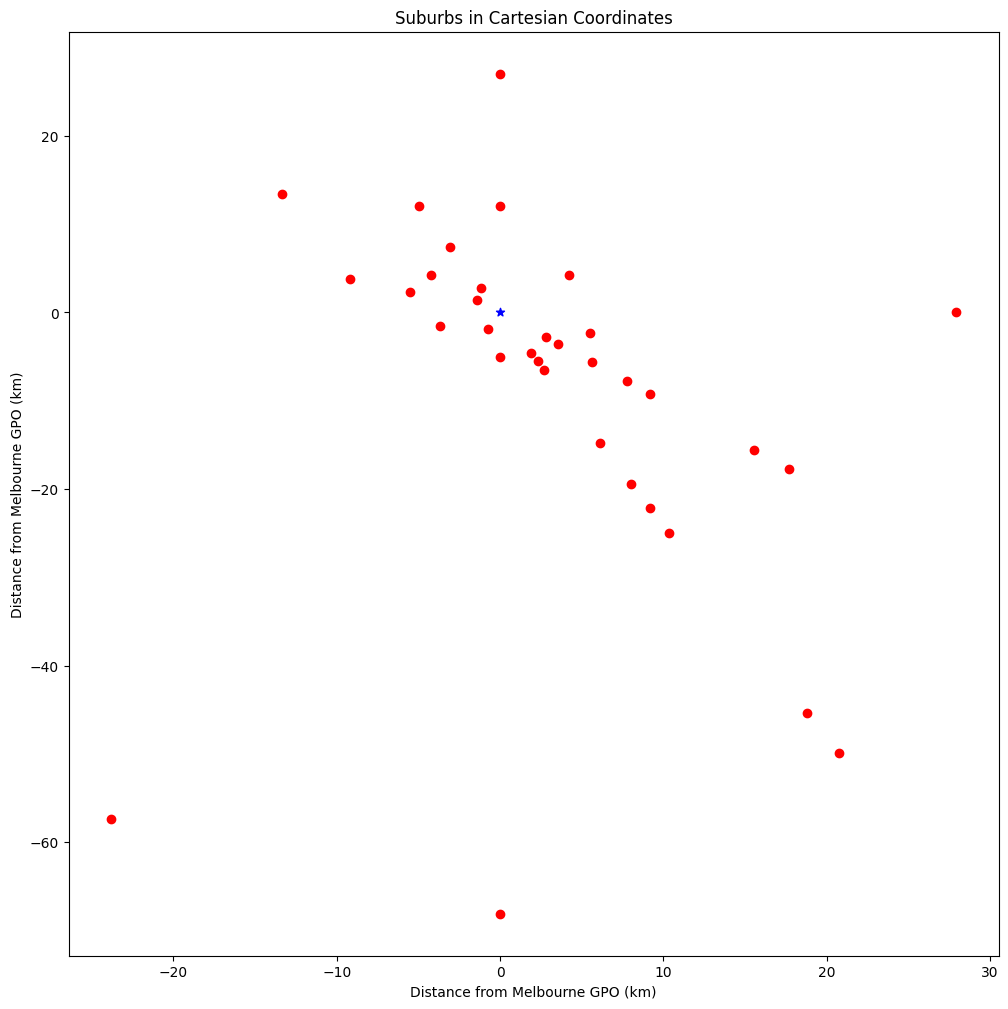

In [9]:
# plot the suburbs in cartesian coordinates
suburb_cart_coords = [get_cartesian_coords(x) for x in suburb_coords]

plt.figure(figsize=(12, 12))
plt.scatter(*zip(*suburb_cart_coords), color='red')
plt.scatter(0, 0, color='blue', marker='*')
plt.title('Suburbs in Cartesian Coordinates')
plt.xlabel('Distance from Melbourne GPO (km)')
plt.ylabel('Distance from Melbourne GPO (km)')
plt.show()

In [10]:
# append the cartesian coordinates to the dataframe
data['cart_coords'] = suburb_cart_coords
data.to_csv('combined_data_with_loc.csv', index=False)

data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_coords,cart_coords
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,3313.052180,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,"[-37.77560561610016, 144.91487058127825]","[-4.2303770670322125, 4.251469513043133]"
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,"[-37.77931503328412, 144.858154908118]","[-9.212551972726303, 3.839001141378051]"
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,"[-37.570576289335236, 144.963028]","[0.0, 27.0496904626518]"
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,"[-37.813410812880704, 145.28101336486003]","[27.933349229709584, 0.047723430246702336]"
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,3799.030890,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,"[-37.70572403739175, 144.963028]","[0.0, 12.02194653133057]"
